### Lab | Imbalanced data

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, cohen_kappa_score

In [54]:
data = pd.read_csv('files_for_lab/customer_churn.csv')
data.T.head(30)


,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,...,9767-FFLEM,0639-TSIQW,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,...,No,Yes,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,No,Yes,No,No,No internet service,Yes,No,Yes,No,Yes


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [56]:
print(data.gender.count())
print(data.gender.value_counts())
data.columns

7043
Male      3555
Female    3488
Name: gender, dtype: int64


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [57]:
list=[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

pd.set_option("display.max_colwidth", 150)

def values_check(x,y):
    lst=[]
    for i in y:
        a = i
        b = x[i].count()
        if len(x[i].unique())>15: 
            c = '>10' 
        else: 
            c = []
            for j in range(0,len(x[i].value_counts())): 
                ab = x[i].value_counts().index[j] 
                ac = x[i].value_counts()[j]
                c.append((ab,ac))
        d = data.dtypes[i]
        lst.append((a,b,c,d))
    return pd.DataFrame(lst)

values_check(data,data.columns)


,0,1,2,3
0,customerID,7043,>10,object
1,gender,7043,"[(Male, 3555), (Female, 3488)]",object
2,SeniorCitizen,7043,"[(0, 5901), (1, 1142)]",int64
3,Partner,7043,"[(No, 3641), (Yes, 3402)]",object
4,Dependents,7043,"[(No, 4933), (Yes, 2110)]",object
5,tenure,7043,>10,int64
6,PhoneService,7043,"[(Yes, 6361), (No, 682)]",object
7,MultipleLines,7043,"[(No, 3390), (Yes, 2971), (No phone service, 682)]",object
8,InternetService,7043,"[(Fiber optic, 3096), (DSL, 2421), (No, 1526)]",object
9,OnlineSecurity,7043,"[(No, 3498), (Yes, 2019), (No internet service, 1526)]",object


In [58]:
# extracting the relevant columns
# tenure, SeniorCitizen, MonthlyCharges

data_target = data[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'Churn']]
data_target.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes


In [59]:
values_check(data_target,data_target.columns)

,0,1,2,3
0,tenure,7043,>10,int64
1,SeniorCitizen,7043,"[(0, 5901), (1, 1142)]",int64
2,MonthlyCharges,7043,>10,float64
3,Churn,7043,"[(No, 5174), (Yes, 1869)]",object


In [60]:
# the dataset (forcasted variable) is imbalanced
1869/7043

0.2653698707936959

In [61]:
# building a model

X = data_target[data_target.columns[~data_target.columns.isin(['Churn'])]]
y = data_target[data_target.columns[data_target.columns.isin(['Churn'])]]

X.corr()

,tenure,SeniorCitizen,MonthlyCharges
tenure,1.000000,0.016567,0.247900
SeniorCitizen,0.016567,1.000000,0.220173
MonthlyCharges,0.247900,0.220173,1.000000


In [62]:
data_target.columns=='Churn'

array([False, False, False,  True])

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0) 
#X_train.isna().sum()
#y_test.isna().sum()


In [64]:
transformer = StandardScaler()
transformer.fit(X_train)

X_train_scaled_np = transformer.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns)

X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X.columns)
#X_train_scaled.head()


In [65]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

/Users/ttrofff/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [66]:
y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

The confusion matrix on the TRAIN set is: 


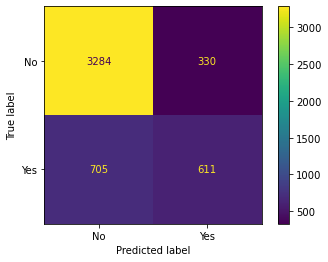

In [67]:
print("The confusion matrix on the TRAIN set is: ")

cm = confusion_matrix(y_train, y_pred_train)

disp = ConfusionMatrixDisplay(cm,display_labels=lr.classes_);
disp.plot()
plt.show()

The confusion matrix on the TEST set is: 


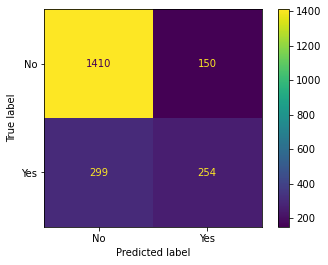

In [68]:
print("The confusion matrix on the TEST set is: ")

cm = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(cm,display_labels=lr.classes_);
disp.plot()
plt.show()

In [69]:
print(classification_report(y_train, y_pred_train,target_names=['No','Yes']))

              precision    recall  f1-score   support

          No       0.82      0.91      0.86      3614
         Yes       0.65      0.46      0.54      1316

    accuracy                           0.79      4930
   macro avg       0.74      0.69      0.70      4930
weighted avg       0.78      0.79      0.78      4930



In [70]:
print(classification_report(y_test, y_pred_test,target_names=['No','Yes']))

              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1560
         Yes       0.63      0.46      0.53       553

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.78      2113



In [71]:
cohen_kappa_score(y_test, y_pred_test)

0.39774851664776034

In [72]:
# the model shows very high probability of type-2 error (number of false negatives is more than 50% of actual positives)
# but it shows accuracy over 70% as the amount of actual negative outcomes is 75%, and the model is skewed and tends 
# to predict everything as negative which is true for 75% of the cases.
# cohen kappa is very low.

# Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based 
# on nearest neighbors that adds new points between existing points.
# Apply imblearn.over_sampling.SMOTE to the dataset. 
# Build and evaluate the logistic regression model. Is it there any improvement?

In [73]:
# Synthetic Minority Oversampling TEchnique (SMOTE) 
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test_SMOTE = lr.predict(X_test_scaled)
#print(y_train.value_counts())
#print(len(X_train))
#print(len(y_train_SMOTE))

/Users/ttrofff/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


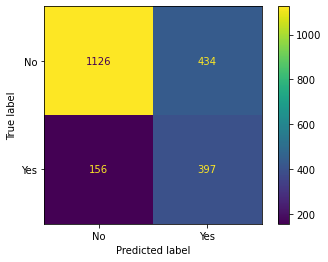

In [74]:
cm_test_SMOTE = confusion_matrix(y_test,y_pred_test_SMOTE)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test_SMOTE, display_labels=lr.classes_)
disp.plot()
plt.show()

In [75]:
print(classification_report(y_test, y_pred_test_SMOTE,target_names=['No','Yes']))

              precision    recall  f1-score   support

          No       0.88      0.72      0.79      1560
         Yes       0.48      0.72      0.57       553

    accuracy                           0.72      2113
   macro avg       0.68      0.72      0.68      2113
weighted avg       0.77      0.72      0.74      2113



In [76]:
cohen_kappa_score(y_test, y_pred_test_SMOTE)

0.3783143320769997

In [77]:
# The probability of type-2 error has decreased (recall going up from 0,46 to 0,72)
# However we can also see decrease in precission (0,48 vs 0,63) as the model now 'wants' to assigns 'Yes' labels 
# more eagerly (hence the share of type-1 errors has encreased). 
# It seems that the source data is not very predictive for the churn lables, thats became more clear after
# the issue of class imbalance was mitigated and the accuracy of the model has decreased.
# Surprisingly (or not) cohen kappa stayed at the same level (the errors morphed from type-2 to type-1 with 
# the same total count)